# Rotational transformation to ship fixed.

# Purpose
Wind and waves are given in world coordinates, how to transform them to ship fixed?

# Methodology
Using scipy to do the rotational transformation

# Setup

In [2]:
# %load imports.py
from typing import no_type_check
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sp



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from scipy.spatial.transform import Rotation as R

## Example usage

(-1.0, 1.0)

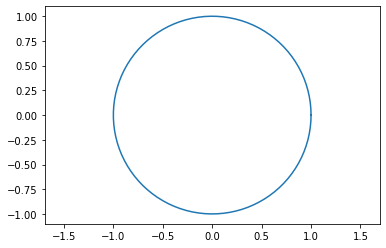

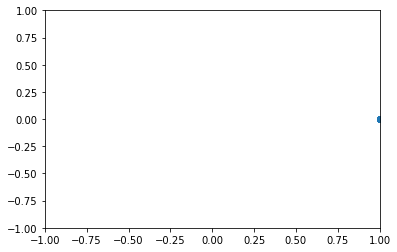

In [4]:
psi = np.linspace(0,360,100)
r = R.from_euler('z', psi, degrees=True)
coords = r.apply([1,0,0])

fig,ax = plt.subplots()
ax.plot(coords[:,0], coords[:,1],'-');
ax.axis('equal');

r2 = r.inv()
coords = r2.apply(coords)

fig,ax = plt.subplots()
ax.plot(coords[:,0], coords[:,1],'o');
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)

In [5]:
from sympy.vector import CoordSys3D
W = CoordSys3D(name='W')
psi = sp.symbols('psi')
B = W.orient_new_axis('B', psi, W.k)
W.rotation_matrix(B)

Matrix([
[cos(psi), -sin(psi), 0],
[sin(psi),  cos(psi), 0],
[       0,         0, 1]])